In [40]:
from PIL import ImageGrab, Image
import numpy as np
import cv2
import time

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from typing import List

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
time.sleep(1)
image = ImageGrab.grab()

In [2]:
image = Image.open("sc.jpg")

In [3]:
image_data = np.array(image)
image_data.shape

(1080, 1920, 3)

In [4]:
%autoreload
from utils import validate_pokemmo_running, have_sweet_scent, crop_to_game

In [5]:
validate_pokemmo_running(image)

False

In [6]:
have_sweet_scent(image)

True

(160, 40)
(40, 160, 3)


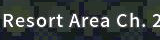

In [7]:
area_text = image.crop([40, 30, 200, 70])
print(area_text.size)
print(np.array(area_text).shape)
display(area_text)

In [8]:
area_text_data = np.array(area_text)

In [39]:
pixel_sum = np.sum(area_text_data, axis=2)
white_columns = np.unique(np.where(pixel_sum > 760)[1])
white_columns[np.where(np.diff(white_columns) > 2)]


array([  5,  11,  23,  33,  39,  45,  51,  54,  59,  79,  84,  97, 102,
       108, 124, 132, 137, 143], dtype=int64)

14
(40, 14, 3)


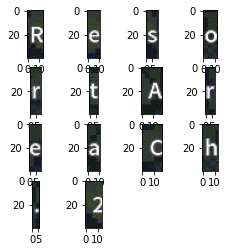

In [52]:
def split_by_letter(data: np.ndarray, white_pixel_sum_threshold:int=730, seperation_tolerance:int=2, offset:int=2) -> List[np.ndarray]:
    pixel_sum = np.sum(data, axis=2)
    white_columns = np.unique(np.where(pixel_sum > white_pixel_sum_threshold)[1])
    splits = white_columns[np.where(np.diff(white_columns) > seperation_tolerance)] + offset
    data_text_splits = np.split(data, splits, axis=1)
    return data_text_splits

area_text_splits = split_by_letter(area_text_data)
images = []
plt_dim = int(np.ceil(np.sqrt(len(area_text_splits))))
fig=plt.figure(figsize=(plt_dim, plt_dim))

for i, text_data in enumerate(area_text_splits):
    text_img = Image.fromarray(text_data)
    images.append(text_img)
    fig.add_subplot(plt_dim, plt_dim, i+1)
    plt.imshow(text_img)

plt.show()

In [54]:
with open("labels.txt", "w") as f:
    for i in range(48, 58):
        f.write(chr(i))
        f.write("\n")
    for i in range(97, 123):
        f.write(chr(i))
        f.write("\n")
    for i in range(65, 91):
        f.write(chr(i))
        f.write("\n")

'>'

ModuleNotFoundError: No module named 'matplotlib'

In [19]:
# area_text_cv2 = np.asarray(area_text)
area_text_cv2 = cv2.cvtColor(np.array(area_text), cv2.COLOR_RGB2BGR)

def consecutive(data):
    return np.split(data, np.where(np.diff(data) != 1)[0]+1)


spl = list(map(lambda x: x[-1], 
    consecutive(np.unique(np.argwhere(area_text_cv2.sum(axis=0) < 30)[:, 0]))))


splits = np.split(area_text_cv2, spl, axis=1)

IndexError: index -1 is out of bounds for axis 0 with size 0